# Parabolas and Where to Find Them

A regression back to High School math, with the goal of understanding how to fit a 2D rotated parabola.


In [20]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

## 1D Parabola

In [2]:
# create some x axis data
xs = np.linspace(-20, 20)

In [3]:
xs

array([-20.        , -19.18367347, -18.36734694, -17.55102041,
       -16.73469388, -15.91836735, -15.10204082, -14.28571429,
       -13.46938776, -12.65306122, -11.83673469, -11.02040816,
       -10.20408163,  -9.3877551 ,  -8.57142857,  -7.75510204,
        -6.93877551,  -6.12244898,  -5.30612245,  -4.48979592,
        -3.67346939,  -2.85714286,  -2.04081633,  -1.2244898 ,
        -0.40816327,   0.40816327,   1.2244898 ,   2.04081633,
         2.85714286,   3.67346939,   4.48979592,   5.30612245,
         6.12244898,   6.93877551,   7.75510204,   8.57142857,
         9.3877551 ,  10.20408163,  11.02040816,  11.83673469,
        12.65306122,  13.46938776,  14.28571429,  15.10204082,
        15.91836735,  16.73469388,  17.55102041,  18.36734694,
        19.18367347,  20.        ])

In [4]:
# and our y axis data uses the equation for a parabola
f = 5.
zs = (1 / (4.*f))*(xs)**2


<IPython.core.display.Javascript object>


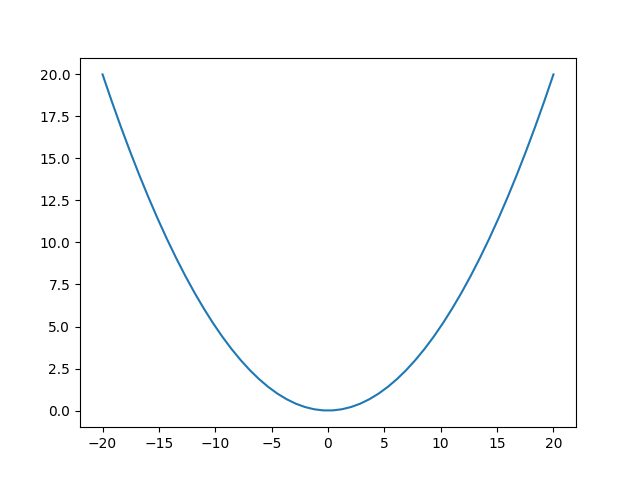

In [5]:
# make sure it looks right!
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs)

In [6]:
# now apply some vertices and watch the displacement happen
v1 = 10.
v2 = 10.
zs2 = ((1/(4.*f))*(xs - v1)**2) + v2

<IPython.core.display.Javascript object>


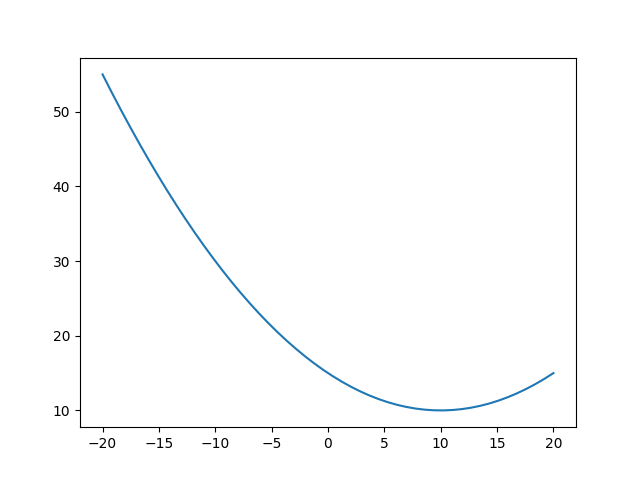

In [7]:
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, zs2)

## 2D Parabola

In [8]:
# now we need to create x and y axis data
ys = np.linspace(-20., 20.)
xs2d, ys2d = np.meshgrid(xs, ys)
# and here we apply a 2D parabola equation
zs2d = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2
zs2d.shape

(50, 50)

<IPython.core.display.Javascript object>


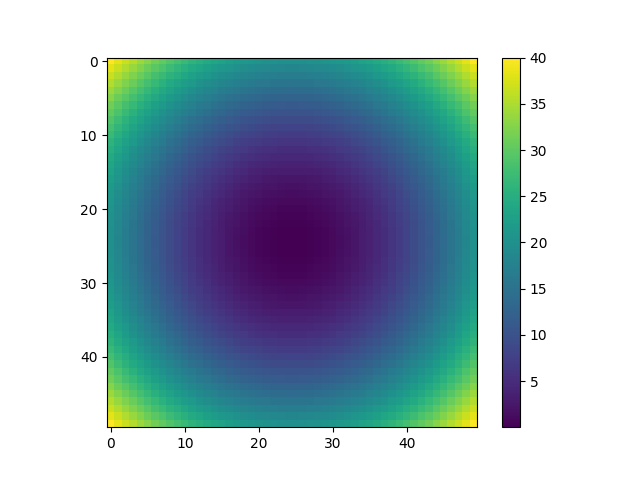

In [9]:
# make sure this 2D parabola makes sense
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(zs2d)
cbar = fig.colorbar(cax)

<IPython.core.display.Javascript object>


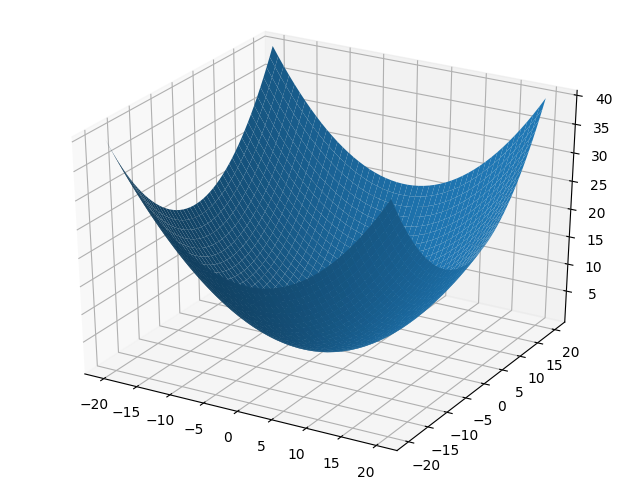

In [10]:
# surface plot is even more informative
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d)

In [11]:
# now let's apply the equation for a 2D Parabola but with vertices (displacement)
v2 = 10.
v1x = v1y = 7.5
zs2d2 = (1 / (4.*f))*(xs2d - v1x)**2 + (1 / (4.*f))*(ys2d - v1y)**2 + v2;

<IPython.core.display.Javascript object>


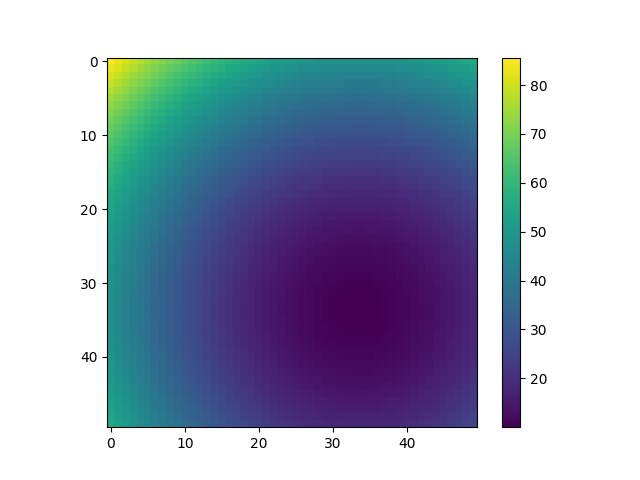

In [12]:
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(zs2d2)
fig.colorbar(cax)

<IPython.core.display.Javascript object>


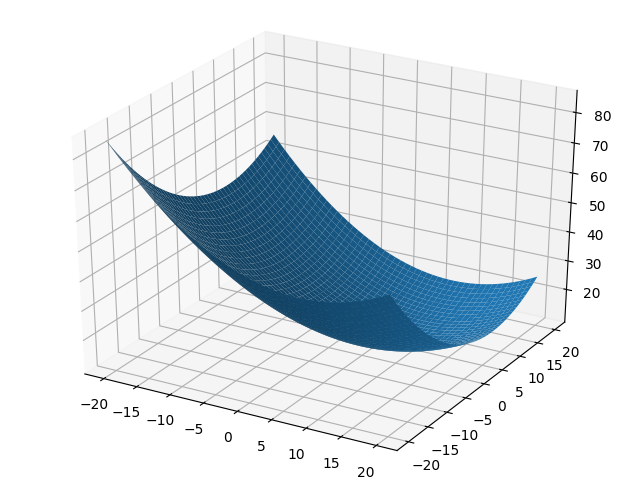

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, zs2d2)

## Simple 1D Parabola Fit

In [14]:
# now create a simple 1 D parabola but with added noise
focal = 5.
data1D = (1 / (4.*focal))*(xs)**2 + (np.random.rand(50))
data1D.shape

(50,)

<IPython.core.display.Javascript object>


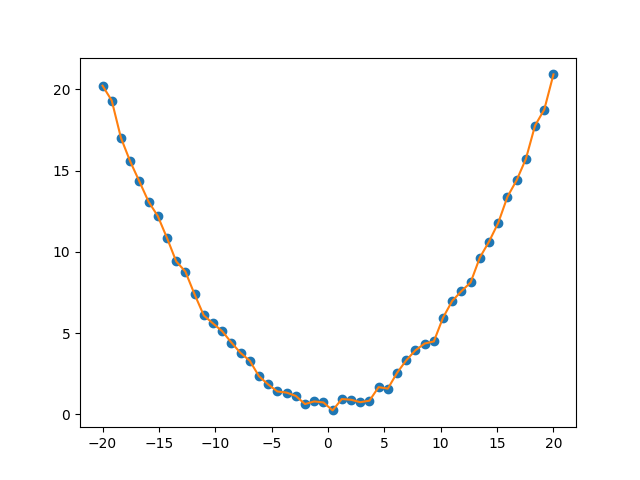

In [15]:
# make sure it looks right
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, data1D)

In [16]:
# we want to fit this data to the equation of a 1D parabola (NO vertices)
def fun(coeffs, xdata):
    return (1 / (4.*coeffs[0]))*(xdata)**2

In [17]:
# and what we want to minimize is the difference between the function above and our made up data
def errfun(coeffs, xdata, ydata):
    return fun(coeffs, xdata) - ydata

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.80326402]


<IPython.core.display.Javascript object>


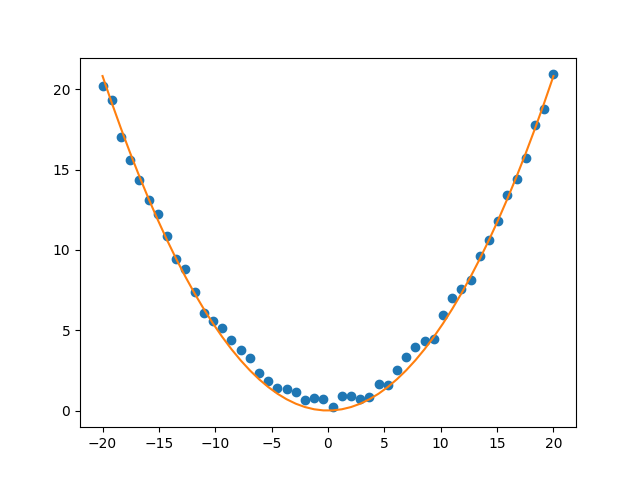

In [18]:
# here we use scipy to fit our data
from scipy.optimize import least_squares
#r = least_squares(errfun, [3.5], args=(xs, data1D), ftol=1e-15)
# we set our inital guess close to the original value of the focus of 5
guess = [3.5]
r = least_squares(errfun, guess, args=(xs, data1D))
#print r
# what's the answer?  Was it able to find an answer?
print r.success
print r.message
print r.nfev
print r.x

# let's see what the fitted data looks like: that is, the application of the fit
# we found from above to the parabola function
fittedFocus = r.x
fittedData = fun([fittedFocus], xs)

# graph the two together to see how close the fit is
fig = plt.figure()
ax = fig.gca()
ax.plot(xs, data1D, 'o', xs, fittedData)


## Simple 2D Parabola Fitting


<IPython.core.display.Javascript object>


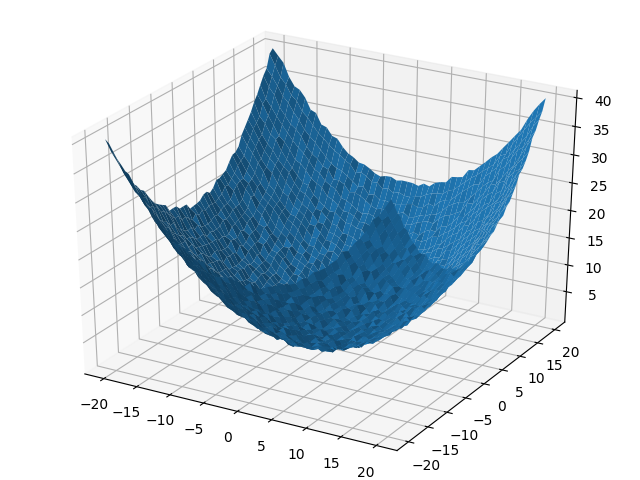

In [21]:
# same thing as above, but in 2D - make some noisy data
xs2d, ys2d = np.meshgrid(xs, ys)
data2D = (1 / (4.*f))*(xs2d)**2 +  (1 / (4.*f))*(ys2d)**2 + np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)


In [23]:
def fun(coeffs, xdata, ydata):
    return (1 / (4.*coeffs[0]))*(xdata)**2 + (1 / (4.*coeffs[0]))*(ydata)**2

In [24]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

True
Both `ftol` and `xtol` termination conditions are satisfied.
6
[4.87604744]


<IPython.core.display.Javascript object>


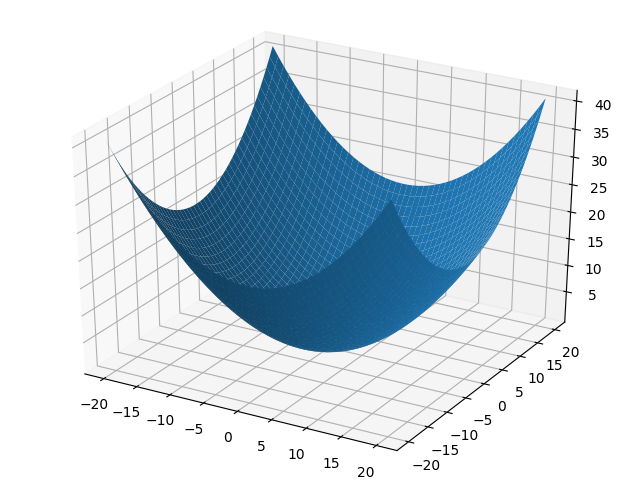

In [25]:
# find a fit for the 2D data
r = least_squares(errfun, [3.5], args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()))
#print r
print r.success
print r.message
print r.nfev
print r.x

# take a look at the fitted data
fittedFocus = r.x
fittedData = fun([fittedFocus], xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>


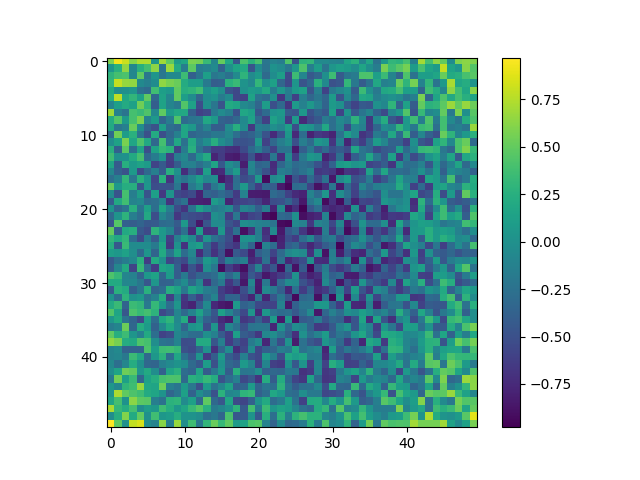

focus 5.0


In [27]:
# from the graphs above, the fit looks good, but lets find the difference
# between the fit and the original data anyways
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(residuals)
fig.colorbar(cax)
print "focus", f

## 2D Parabola Fitting with vertices

<IPython.core.display.Javascript object>


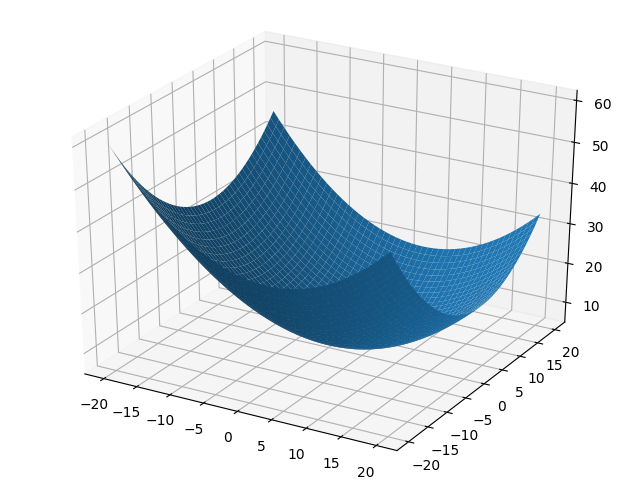

In [76]:
# Same thing as above, just our parabola function for creating the noisy data,
# and the function we are fitting to, just get a little more complicated
xs2d, ys2d = np.meshgrid(xs, ys)
v1x = 3.0
v1y = 4.0
v2 = 6.0
data2D = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2
#np.random.rand(50, 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2D)

In [77]:
def fun(coeffs, xdata, ydata):
    f = coeffs[0]
    v1x = coeffs[1]
    v1y = coeffs[2]
    v2 = coeffs[3]
    return (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2 + v2    #
    #r2 = (1 / (4.*f))*(xdata - v1x)**2 + (1 / (4.*f))*(ydata - v1y)**2
    #hr = 100.
    #return (r2 * (hr**2 > r2)) + v2

In [78]:
def errfun(coeffs, xdata, ydata, zdata):
    return fun(coeffs, xdata, ydata) - zdata

In [79]:
# see if we come up with a fit, using a guess pretty close the original params that
# were used to create the data
#guess = [3.5, 2.0, 2.0, 2.0]
guess = [f, v1x, v1y, v2]
r = least_squares(errfun, guess, args=(xs2d.flatten(), ys2d.flatten(), data2D.flatten()),
                 method='trf', 
                 ftol=1e-15,
                 xtol=1e-15)
#print r
print r.success
print r.message
print r.nfev
print r.x

True
`gtol` termination condition is satisfied.
1
[5. 3. 4. 6.]


<IPython.core.display.Javascript object>


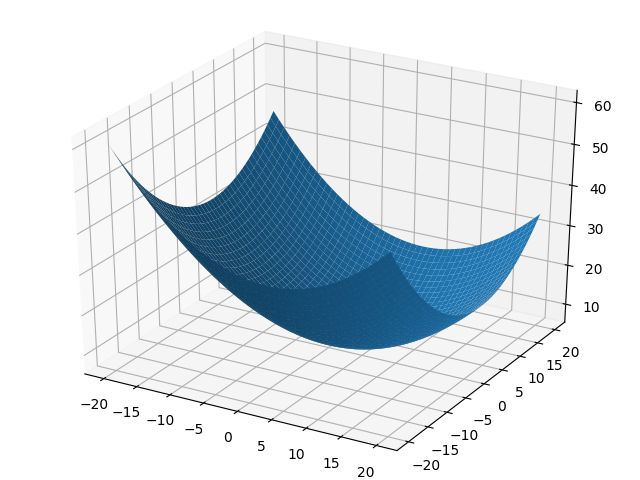

In [66]:
# take a look at the fitted data
fittedFocus = r.x
fittedData = fun(r.x, xs2d, ys2d)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, fittedData)

<IPython.core.display.Javascript object>


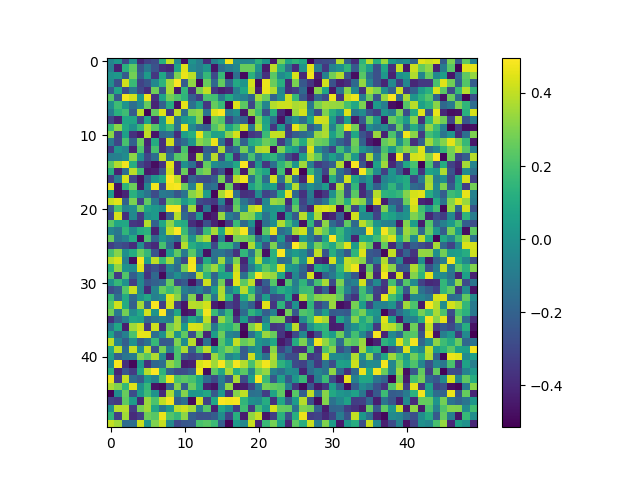

In [67]:
# and again, make sure the difference between the fit and the original data is small
residuals = fittedData - data2D
fig = plt.figure()
ax = fig.gca()
cax = ax.imshow(residuals)
cbar = fig.colorbar(cax)

In [30]:
np.max(residuals)

0.5005146296212928

## 2D Rotated Parabola

Now things get complicated.  Let's take our 2D parabola and rotate it.

In [31]:
xs2d, ys2d = np.meshgrid(xs, ys)
# first, don't use an displacement
v1x = 0.0
v1y = 0.0
v2 = 0.0
# equation for a 2D parabola
data2d = (1 / (4.*f))*(xs2d  - v1x)**2 +  (1 / (4.*f))*(ys2d - v1y)**2 + v2


<IPython.core.display.Javascript object>


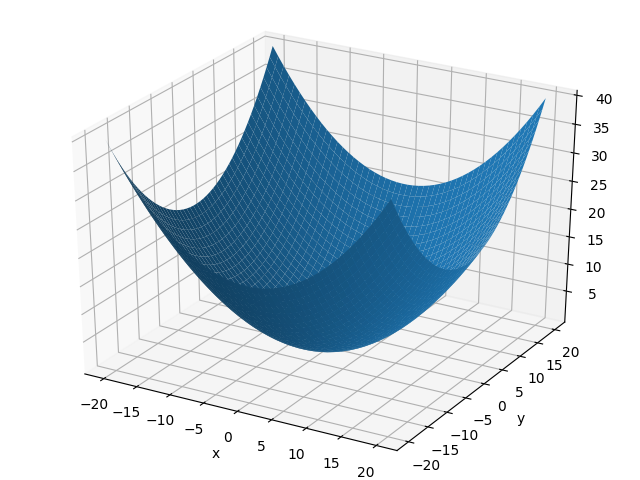

Text(0.5,0,'y')

In [32]:
# make sure the original data looks sensible
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2d, ys2d, data2d)
plt.xlabel("x")
plt.ylabel("y")


In [33]:
# now import the rotation functions we'll need
from rotate import *


In [34]:
# actually rotate the data!

qtrTurn = np.pi / 2
xs2dRot, ys2dRot, zs2dRot = rotateXY(xs2d, ys2d, data2d, qtrTurn, qtrTurn)

<IPython.core.display.Javascript object>


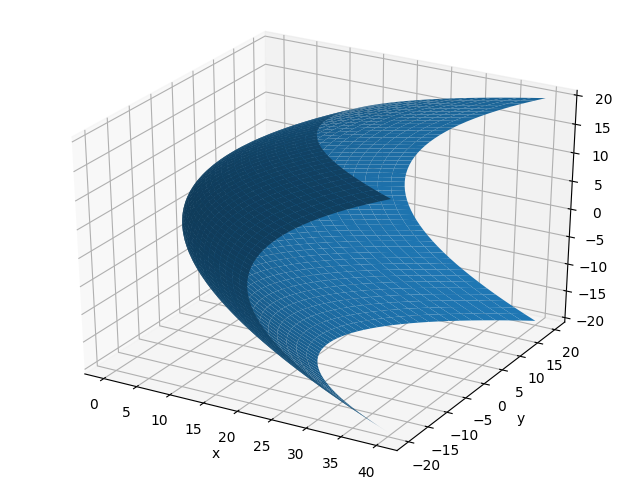

Text(0.5,0,'y')

In [35]:
# now view this to make sure the rotation looks right!
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs2dRot, ys2dRot, zs2dRot)
plt.xlabel("x")
plt.ylabel("y")

## Fit 2D Rotated Parabola

Now we'll try to fit a 2D rotated parabola.  However, things get really complicated, so now we'll switch to using a python module for our parabola methods.  This module comes with a test suite, TestParabolas.py, as well.

In [1]:
from parabolas import *

## Try limits of fitting routine
First let's see what works, and what doesn't.  We'll use a function that simulates parabolas based off the inputs, and tries to find fits for them.  This is like what you'll see in the unit tests

In [17]:
# first, try no rotation
f = 5.0
v1x = 0.0
v1y = 0.0
v2 = 10.0
xRot = 0.
yRot = 0. 
data = [f, v1x, v1y, v2, xRot, yRot]
_, _, _, diff = tryFit(data)
# with no rotation, we easily get the right answer!
# here's the diff between the right answer and our fit
print diff

[0. 0. 0. 0. 0. 0.]


In [18]:
from copy import copy
# even when our inital guess is off
guess = [1.0, 0., 0., 0., 0., 0.]
_, _, _, diff = tryFit(data, guess)
# with no rotation, we easily get the right answer!
print diff

[0.00000000e+00 3.18571680e-15 2.47811901e-16 0.00000000e+00
 2.59557157e-17 8.79718302e-17]


In [19]:
# we can still have success, when just one axis is rotated
import numpy as np
xRot = np.pi/2
data = [f, v1x, v1y, v2, xRot, yRot]
_, _, _, diff = tryFit(data)
# here's the diff between the right answer and our fit
print diff

[0. 0. 0. 0. 0. 0.]


In [20]:
# but trying to rotate at all in the other axis as well brings problems
yRot = 0.1
data = [f, v1x, v1y, v2, xRot, yRot]
_, _, _, diff = tryFit(data)
# here's the diff between the right answer and our fit.
# some parts of the fit are way off
print diff

[8.88178420e-16 1.38968162e-15 8.73292814e-16 0.00000000e+00
 0.00000000e+00 1.00000000e-01]


In [21]:
# if you want to rotate both axis, keep the angles small
xRot = np.pi/10
yRot = np.pi/10
data = [f, v1x, v1y, v2, xRot, yRot]
_, _, _, diff = tryFit(data)
# here's the diff between the right answer and our fit
print diff

[0.00000000e+00 3.37948543e-15 1.40797674e-15 1.77635684e-15
 1.50492712e-02 1.58624900e-02]


## Visualize fits
Here we'll repeat the last example, execpt visualize the simulated vs. fitted data


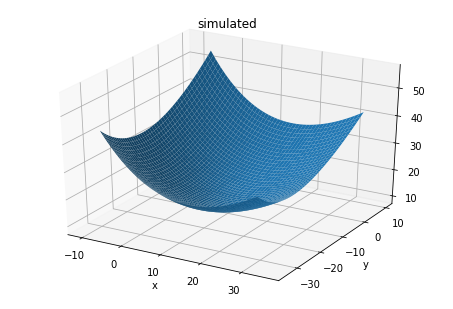

In [22]:
    # create the simulated data
    xs = np.linspace(-20, 20)
    ys = np.linspace(-20, 20)
    
    xs2d, ys2d = np.meshgrid(xs, ys)
    
    #answer = [f, v1x, v1y, v2, -xRot, -yRot]

    xdata, ydata, zdata = simData(xs2d, ys2d, f, v1x, v1y, v2, xRot, yRot)
    
    # and plot it
    surface3dPlot(xdata, ydata, zdata, "simulated")

In [23]:
# now fit this data
# make a really good guess
guess = data
r = lsqFit(xdata, ydata, zdata, guess)
print "fit: ", r.x

# now visualize what this fitted data looks like:
#fFit, v1xFit, v1yFit, v2Fit, xRotFit, yRotFit = r.x
# note how we invert the rotations
#xfit, yfit, zfit = simData(xdata, zdata, fFit, v1xFit, v1yFit, v2Fit, -xRotFit, -yRotFit)

# and plot it
#surface3dPlot(xfit, yfit, zfit, "fitted")

fit:  [ 5.00000000e+00 -2.79216248e-15  8.73543312e-16  1.00000000e+01
 -3.29208537e-01 -2.98296775e-01]


In [9]:
print xRot, yRot



0.314159265359 0.314159265359


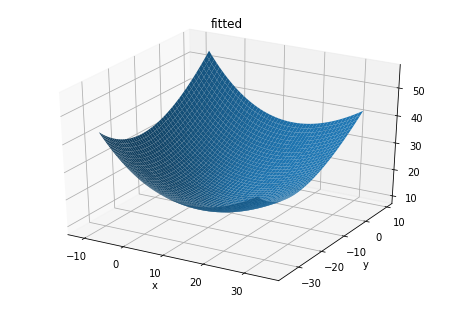

In [24]:
# now visualize what this fitted data looks like:
fFit, v1xFit, v1yFit, v2Fit, xRotFit, yRotFit = r.x
# note how we invert the rotations
xfit, yfit, zfit = simData(xs2d, ys2d, fFit, v1xFit, v1yFit, v2Fit, -xRotFit, -yRotFit)

# and plot it
surface3dPlot(xfit, yfit, zfit, "fitted")